## Following the problem we are trying to solve:

### The Dream Housing Finance Company works with several types of mortgages. They run some targeted marketing activities in order to be able to forecast if a potential consumer will be qualified for a loan or not. They would search for a model that most precisely forecasts qualified clients in order to accomplish this. As a result, the model that correctly predicts "Y" as "Y" should be chosen. The most accurate model is the one in question.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Load Data

In [2]:
loan_data = pd.read_csv('Loan_Data.csv')

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Below the features in the CSV file, for which there is some missing data:

#### - Gender
#### - Married
#### - Dependents
#### - Self_Employed
#### - LoanAmount
#### - Loan_Amount_Term
#### - Credit_History

### Below the features in the CSV file, for which there is a mix of categorical and numerical data:

- Numerical Variables:
    - ApplicantIncome
    - CoapplicantIncome
    - LoanAmount
    - Loan_Amount_Term
- Categorical Variables:
    - Dependents
    - Gender
    - Married
    - Education
    - Self_Employed
    - Credit_History
    - Property_Area

### Our Target column is the Loan_Status

In [5]:
# drop Index
data = loan_data.drop(columns = ['Loan_ID'], inplace = False)

In [6]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Exploratory Data Analysis (EDA)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# Numerical Features - Univariate Analysis

## Boxplot & Histogram

### ApplicantIncome

<Axes: xlabel='ApplicantIncome'>

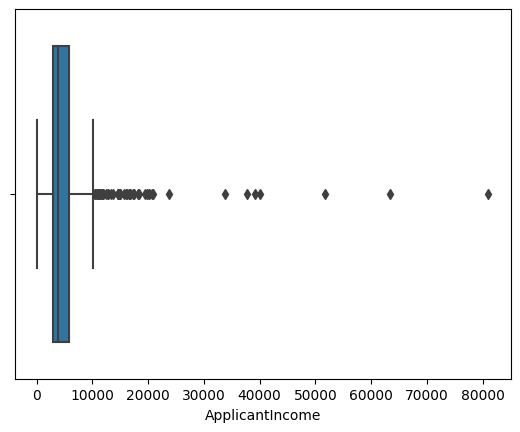

In [54]:
sns.boxplot(x=data['ApplicantIncome'])

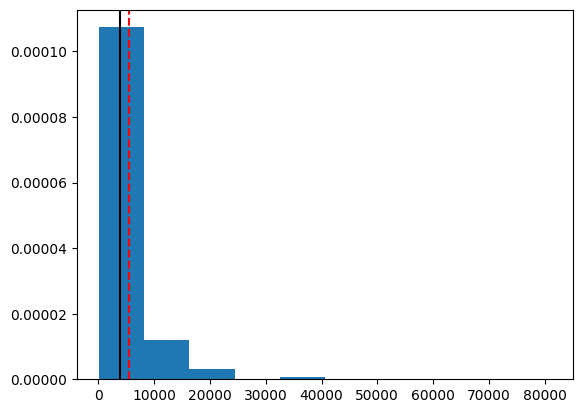

In [55]:
import matplotlib.pyplot as plt
hist = plt.hist(x=data['ApplicantIncome'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['ApplicantIncome'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['ApplicantIncome'].median(), color = 'black', linestyle='-')

### Inference:

- Positiveky skewed distribution
- Outliers on right hand side, but expected with Income
- Median aligns with the Mean

### CoapplicantIncome - feature in the data

<Axes: xlabel='CoapplicantIncome'>

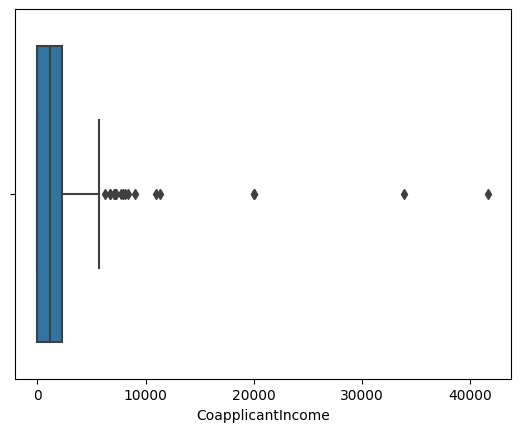

In [56]:
sns.boxplot(x=data['CoapplicantIncome'])

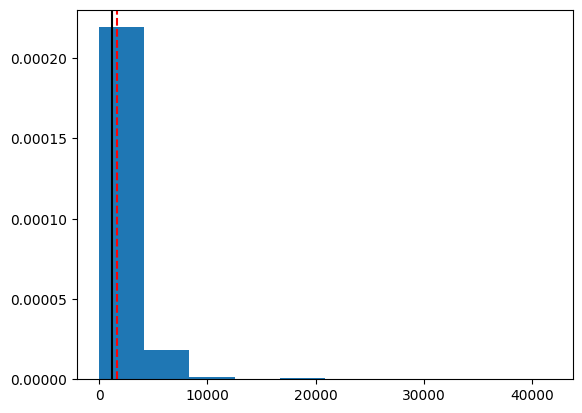

In [57]:
hist = plt.hist(x=data['CoapplicantIncome'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['CoapplicantIncome'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['CoapplicantIncome'].median(), color = 'black', linestyle='-')

Inference:
- Positiveky skewed distribution
- Outliers on right hand side, but expected with Income
- Median aligns with the Mean

### Similarly for the 'LoanAmount' feature

<Axes: xlabel='LoanAmount'>

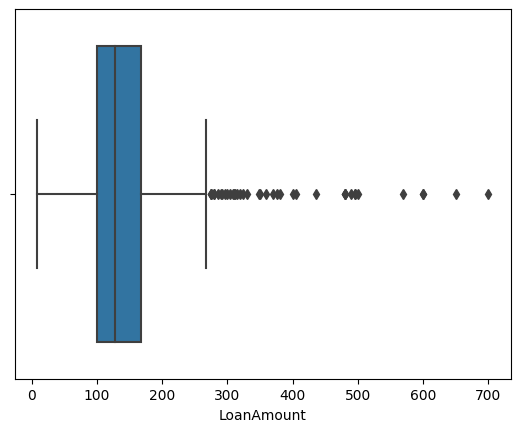

In [58]:
sns.boxplot(x=data['LoanAmount'])

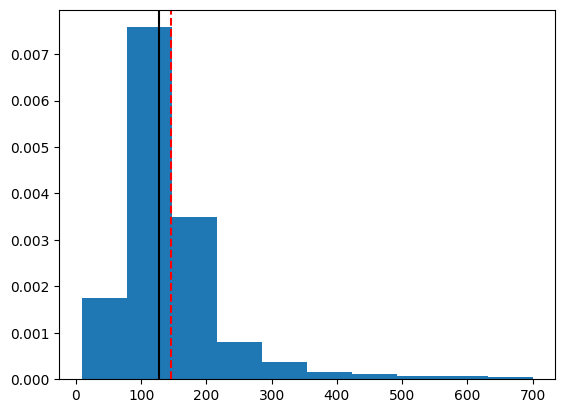

In [59]:
hist = plt.hist(x=data['LoanAmount'], density = True)
# Draw a vertical line in the histogram to visualize mean value of the numerical feature (NaNs will be ignored when calculating the mean)
plt.axvline(data['LoanAmount'].mean(), color = 'red', linestyle='--')
# Draw another vertical line in the histogram to visualize median value of the numerical feature (NaNs will be ignored when calculating the median)
plt.axvline(data['LoanAmount'].median(), color = 'black', linestyle='-')

Inference:

- Slightly positiveky skewed distribution
- Outliers on right hand side, which may need to be treated
- Median aligns with the Mean

# Univariate Analysis

### Feature - Dependents

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3+')])

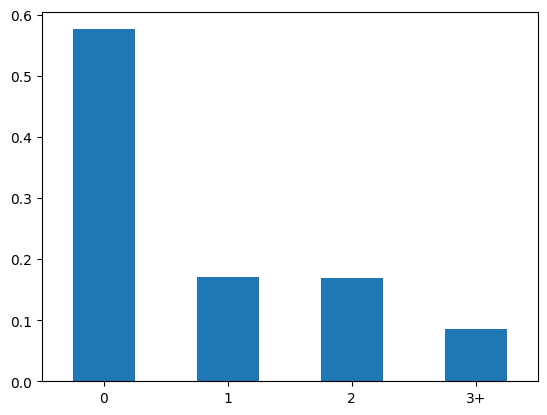

In [60]:
data['Dependents'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Inference:
- Almost 60% of population has 0 dependents

### Feature -  Gender

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

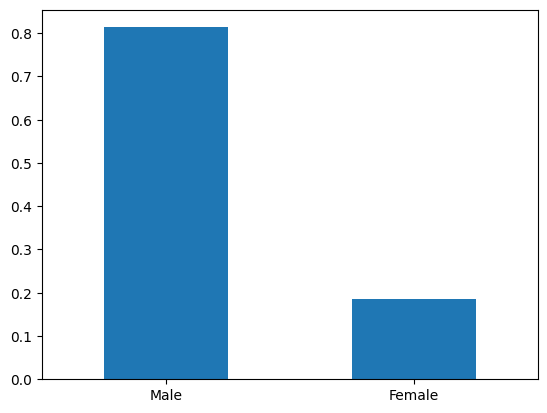

In [61]:
data['Gender'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Inference:
- Almost 80% of population is Male

### Feature - Married

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

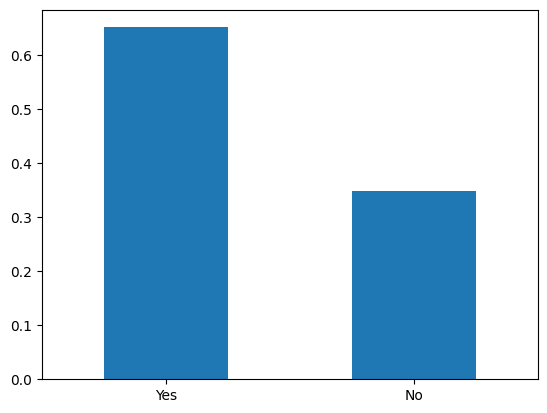

In [62]:
data['Married'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Inference:
- Alittle over 60% of population is Married

### Feature - Education

(array([0, 1]), [Text(0, 0, 'Graduate'), Text(1, 0, 'Not Graduate')])

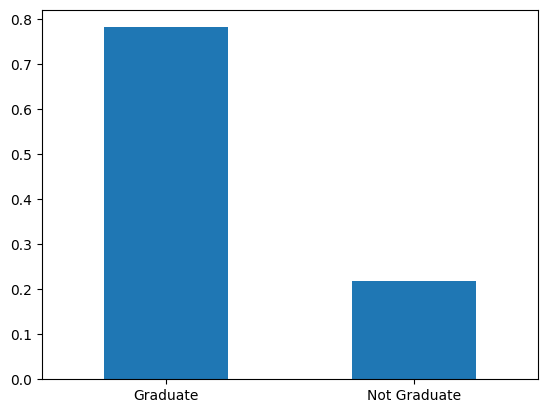

In [63]:
data['Education'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Inference:
- Almost 80% of population is Graduate

### Feature - Self_Employed

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

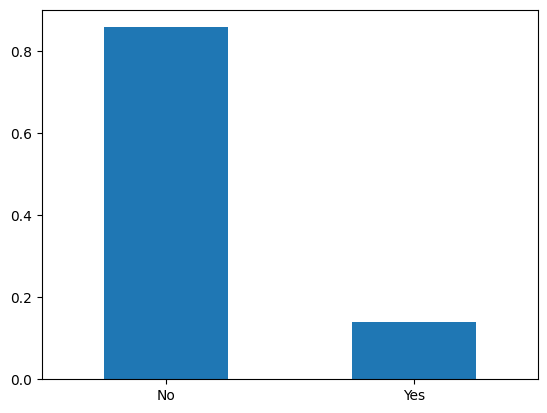

In [64]:
data['Self_Employed'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Inference:
- Almost 80% of population is salaried

### Feature - Credit_History

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '0.0')])

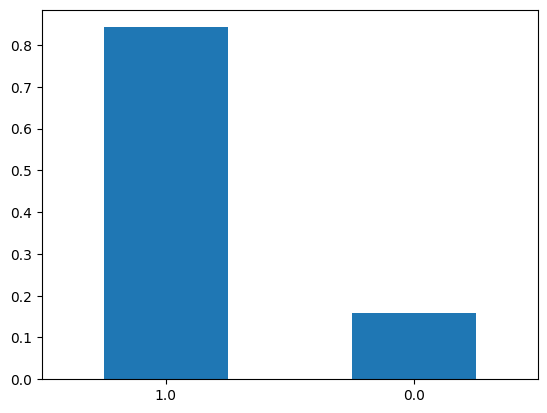

In [65]:
data['Credit_History'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Inference:
- Almost 80% of population has a credit history

### Feature - Property_Area

(array([0, 1, 2]),
 [Text(0, 0, 'Semiurban'), Text(1, 0, 'Urban'), Text(2, 0, 'Rural')])

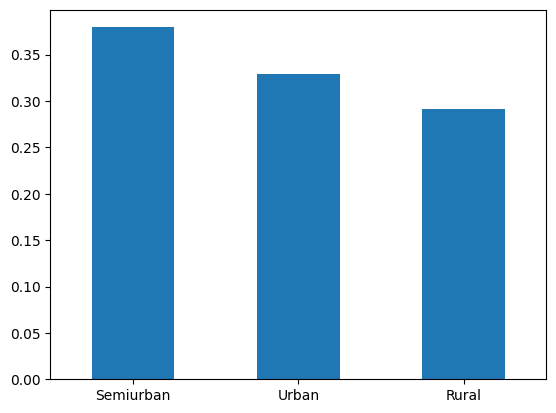

In [66]:
data['Property_Area'].value_counts(normalize = True).plot.bar()
plt.xticks(rotation = 0)

Observation:
- Majority of population resides in Urban / Semi-Urban areas

# Bivariate / Multivariate Analysis

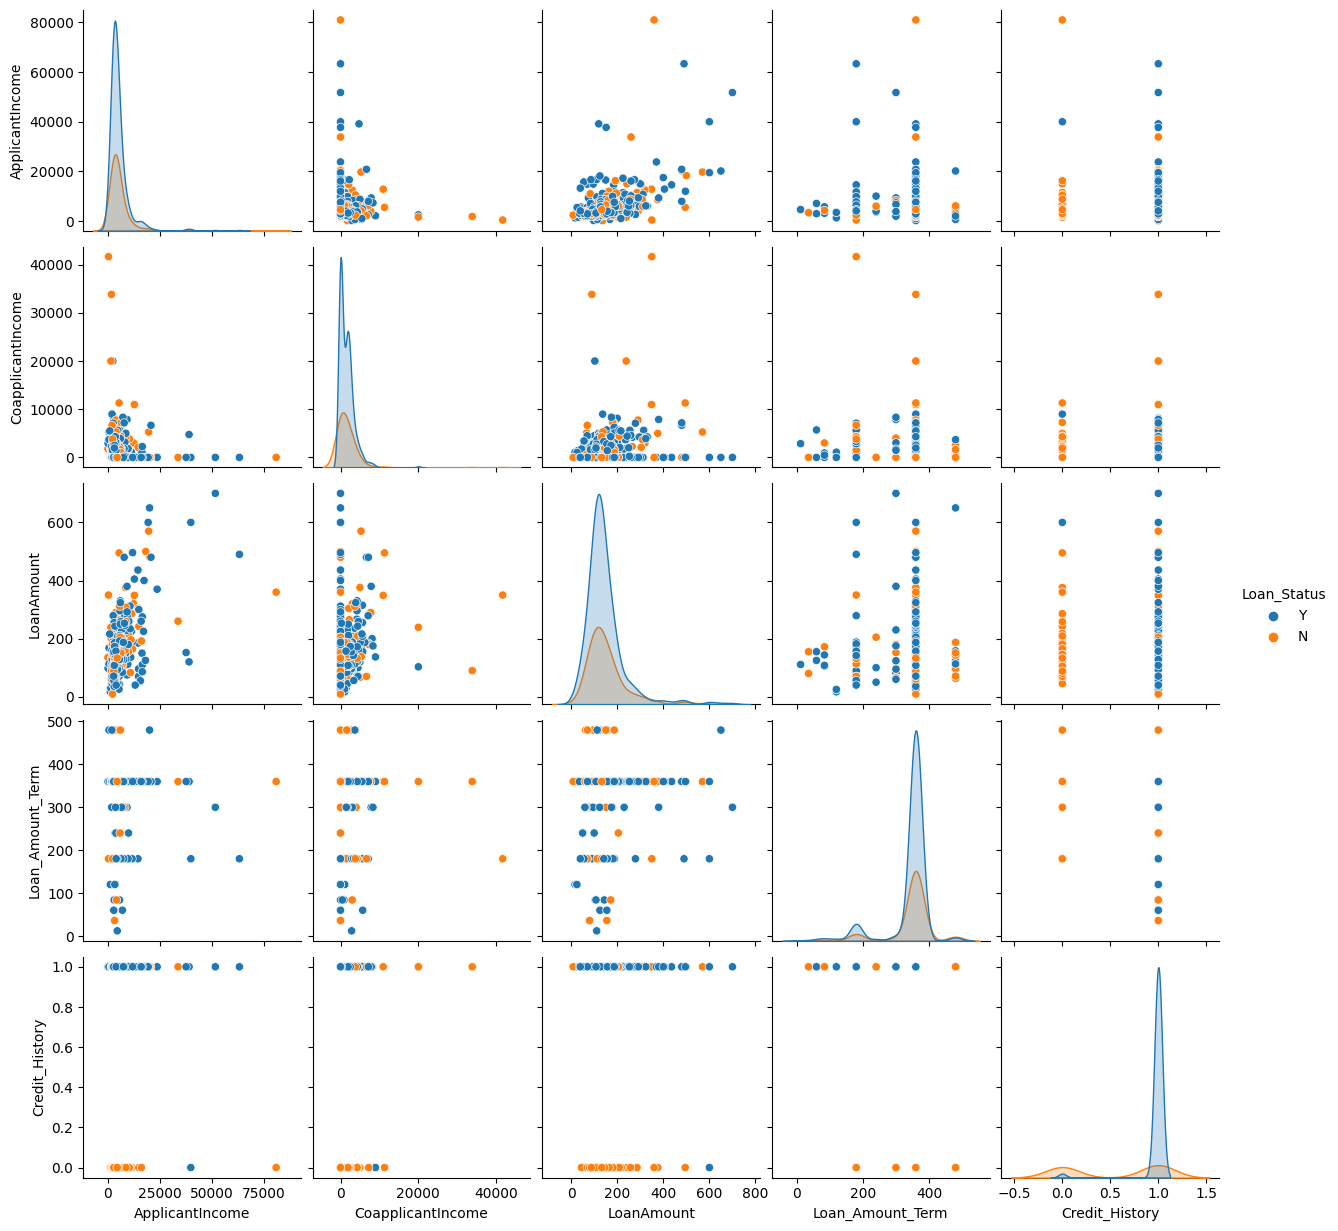

In [67]:
sns.pairplot(loan_data, diag_kind= 'kde', hue = 'Loan_Status')

### This above plot describes the distribution of all the data points across all the dependent featuresm, in their respective data ranges. It creates a pairwise scatter plot of the variables in the loan_data dataset, with kernel density estimates (KDEs) of the distribution on the diagonal, and differentiating the points according to the entire data using different colors.

In [28]:
# Identify Correlation
data.corr()

<ipython-input-28-fd3e9124074a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [68]:
data.corr(method = 'spearman')

<ipython-input-68-509fb0a1e79f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method = 'spearman')


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.320056,0.515397,-0.040111,0.043241
CoapplicantIncome,-0.320056,1.000000,0.240719,-0.013747,-0.007458
LoanAmount,0.515397,0.240719,1.000000,0.041486,-0.002361
Loan_Amount_Term,-0.040111,-0.013747,0.041486,1.000000,0.015088
Credit_History,0.043241,-0.007458,-0.002361,0.015088,1.000000


<ipython-input-69-acbf16fcc3e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')


<Axes: >

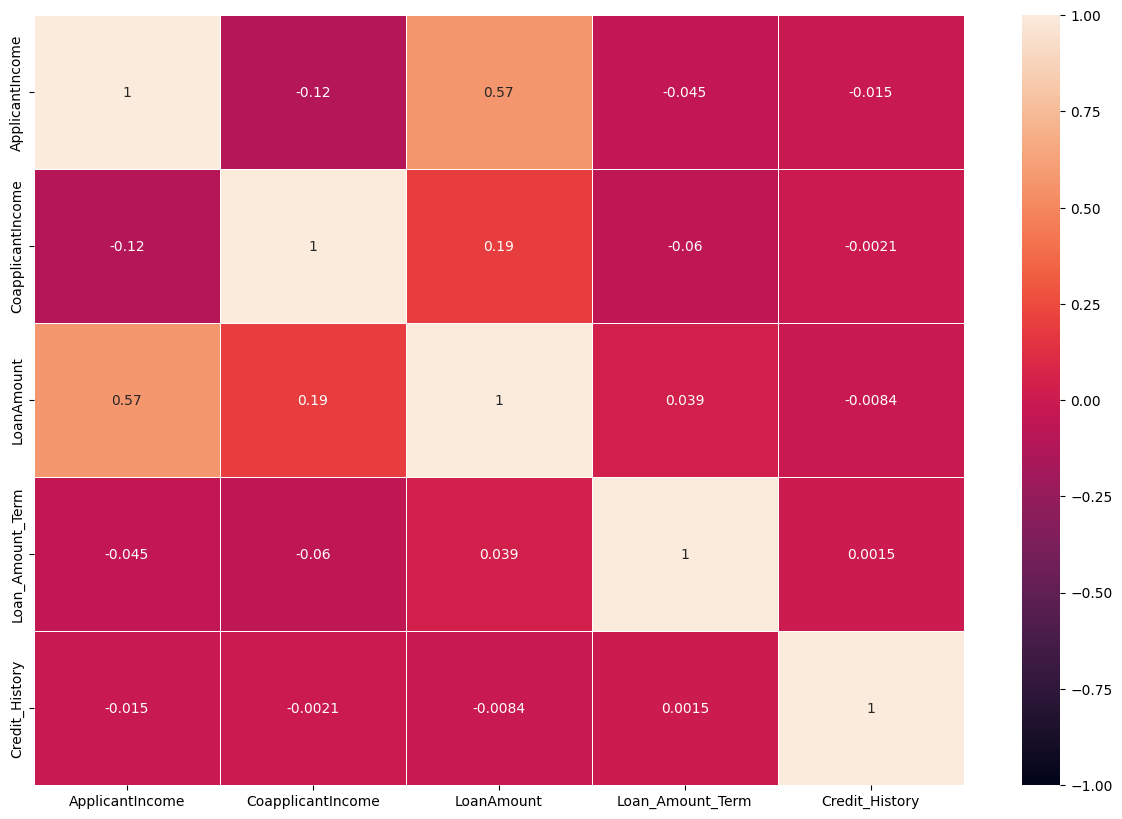

In [69]:
# Plot the Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

<ipython-input-70-395ac1e16be3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method = 'spearman'), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')


<Axes: >

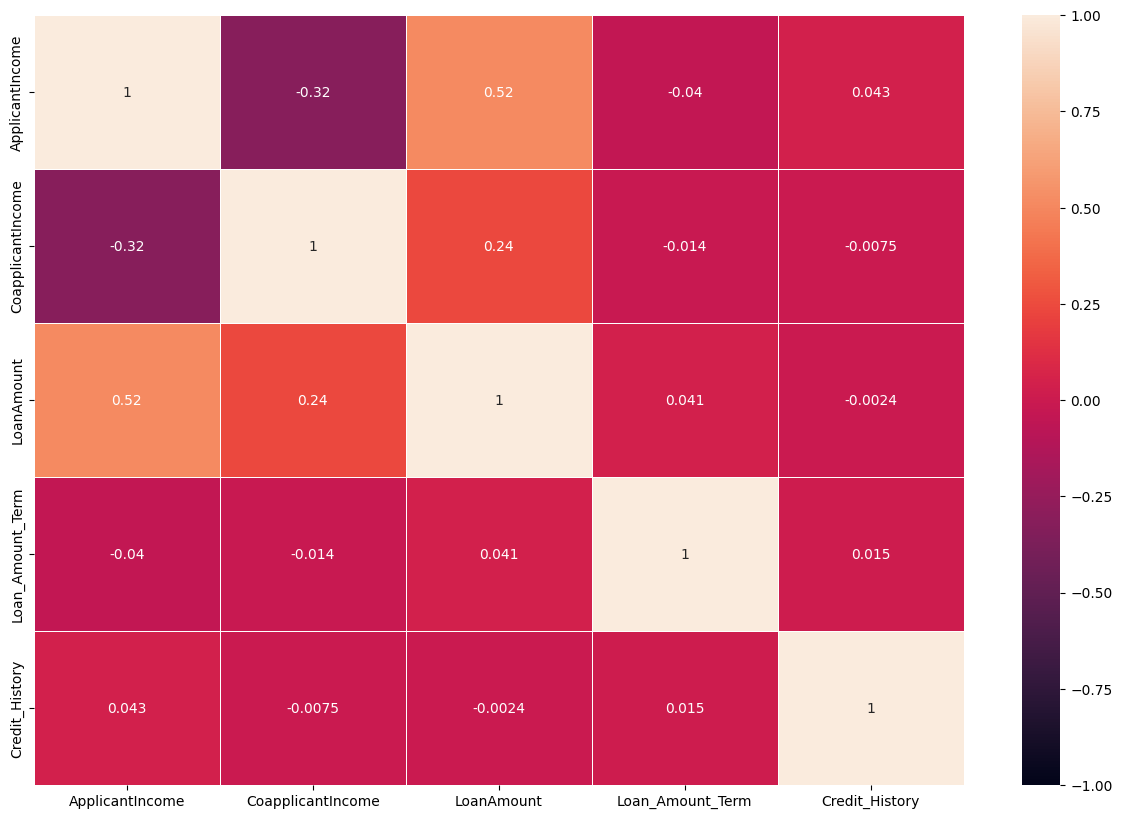

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method = 'spearman'), annot=True, linewidths=.5, vmin = -1, vmax = 1, fmt = '.2g')

### Given the strong correlation between "ApplicantIncome" and "LoanAmount," one of them must be eliminated in order to avoid the multicollinearity of independent variables.

### The VIF calculation below verifies this.


In [71]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Preprocessing

## Imputing null values

In [72]:
# Imputing null for categorical variables with mode
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Education'] = data['Education'].fillna(data['Education'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [73]:
# Imputing null for numerical variables with median - mean was not chosen because of outliers in the data
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace = True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(), inplace = True)

In [74]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Detecting multicollinearity

In [75]:
# Calculating VIF for all numerical variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,ApplicantIncome,2.845794
1,CoapplicantIncome,1.458045
2,LoanAmount,6.457683
3,Loan_Amount_Term,3.753503


In [76]:
# Calculating VIF for all numerical variables except LoanAmount
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = data[['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term']]

vif = pd.DataFrame()
vif["features"] = x.columns
vif["vif_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,features,vif_Factor
0,ApplicantIncome,1.724216
1,CoapplicantIncome,1.287776
2,Loan_Amount_Term,2.072653


### The best course of action is to remove LoanAmount from the collection of independent variables because VIF fector has drastically decreased.

In [77]:
# Drop LoanAmount from data set
data.drop(columns = ['LoanAmount'], inplace = True)

### Balancing Dataset

In [78]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import imblearn

In [81]:
from imblearn.over_sampling import RandomOverSampler

In [82]:
ros = RandomOverSampler(random_state=0)

In [83]:
x = data.drop(columns = ['Loan_Status'])
y = data['Loan_Status']

In [84]:
x, y = ros.fit_resample(x, y)

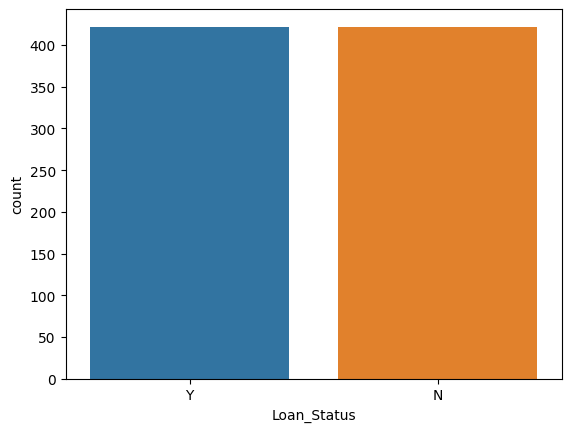

In [85]:
ax = sns.countplot(x=y)

### Therefore, after performing the Under Sampling operation, the count of each class label is equal now

In [86]:
df1=pd.concat([x,y],axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,Y


### ApplicantIncome, CoapplicantIncome, and Loan_Amount_Term all have outliers. However, we would anticipate some outliers to show up in these variables in real life. Consequently, it's crucial to not treat them poorly.

## Preprocessing the data

In [87]:
# OneHotEncoding of object dtype columns
cat_cols = ['Dependents','Gender','Married','Education','Self_Employed','Credit_History','Property_Area']
dummies = pd.get_dummies(df1[cat_cols])
dummies

,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
1,1.0,0,1,0,0,0,1,0,1,1,0,1,0,1,0,0
2,1.0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1
3,1.0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1
4,1.0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,0.0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0
840,1.0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1
841,1.0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
842,0.0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0


In [88]:
#Concat dummmies into data frame
df1 = pd.concat([df1, dummies], axis = 1)

In [89]:
df1.shape

(844, 27)

In [90]:
# Drop original categorical columns from data frame
df1 = df1.drop(cat_cols, axis = 1)

In [91]:
df1.shape

(844, 19)

In [92]:
# determine whether tha target column is balanced or not
y.value_counts()

Y    422
N    422
Name: Loan_Status, dtype: int64

In [93]:
from sklearn.preprocessing import LabelEncoder

In [94]:
df1['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
839    N
840    N
841    N
842    N
843    N
Name: Loan_Status, Length: 844, dtype: object

In [95]:
labelencoder = LabelEncoder()

In [96]:
# Convert the target variable into binary format
y = labelencoder.fit_transform(df1['Loan_Status'])

In [97]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [98]:
# segregate the target variable
x = df1.drop(columns = ['Loan_Status'])

# splitting data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42, stratify = y)

In [99]:
x_train.shape

(633, 18)

In [100]:
x_test.shape

(211, 18)

In [101]:
y_train.shape

(633,)

In [102]:
y_test.shape

(211,)

### Building the classifiers

In [103]:
def confusion_matrix_vizualiser(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('Predicted')
    plt.show()

# Logistic Regression Classifier

In [104]:
lr = LogisticRegression(random_state = 42, class_weight = None)
lr.fit(x_train, y_train)
predictions_lr = lr.predict(x_test)

In [105]:
predictions_lr.shape

(211,)

In [106]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, predictions_lr)))

Model accuracy score with default hyperparameters: 0.5829


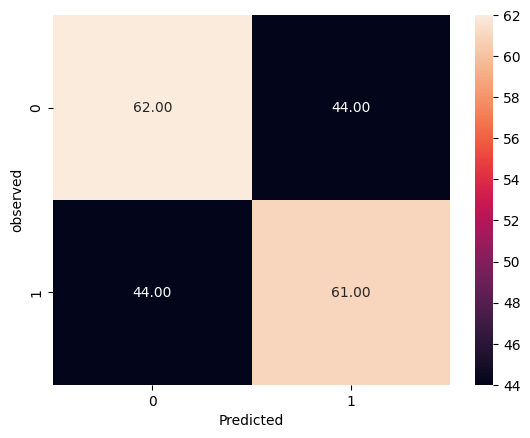

In [107]:
confusion_matrix_vizualiser(y_test, predictions_lr)

In [108]:
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58       106
           1       0.58      0.58      0.58       105

    accuracy                           0.58       211
   macro avg       0.58      0.58      0.58       211
weighted avg       0.58      0.58      0.58       211



# KNN Classifier

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knn = KNeighborsClassifier(n_neighbors = 10, algorithm = 'kd_tree')

In [111]:
knn.fit(x_train, y_train)
predictions_knn = knn.predict(x_test)

In [112]:
predictions_knn.shape

(211,)

In [113]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, predictions_knn)))

Model accuracy score with default hyperparameters: 0.6256


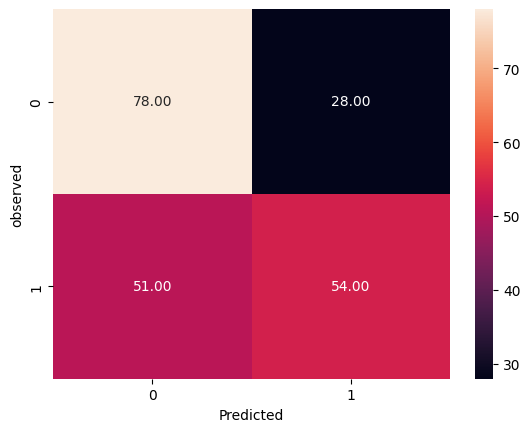

In [114]:
confusion_matrix_vizualiser(y_test, predictions_knn)

In [115]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66       106
           1       0.66      0.51      0.58       105

    accuracy                           0.63       211
   macro avg       0.63      0.63      0.62       211
weighted avg       0.63      0.63      0.62       211



# Bagging Classifier on KNN

In [116]:
baggingknn = BaggingClassifier(knn, random_state = 42)
baggingknn.fit(x_train, y_train)
predictions_bknn = baggingknn.predict(x_test)

In [117]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, predictions_bknn)))

Model accuracy score with default hyperparameters: 0.6351


In [118]:
print(classification_report(y_test, predictions_bknn))

              precision    recall  f1-score   support

           0       0.62      0.72      0.66       106
           1       0.66      0.55      0.60       105

    accuracy                           0.64       211
   macro avg       0.64      0.63      0.63       211
weighted avg       0.64      0.64      0.63       211



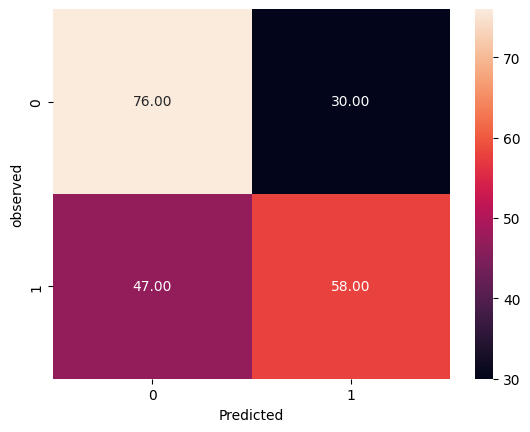

In [119]:
confusion_matrix_vizualiser(y_test, predictions_bknn)

# SVM Model

In [120]:
from sklearn.svm import SVC

In [121]:
svc = SVC()

In [122]:
svc.fit(x_train, y_train)
predictions_svc = knn.predict(x_test)

In [123]:
predictions_svc.shape

(211,)

In [124]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, predictions_svc)))

Model accuracy score with default hyperparameters: 0.6256


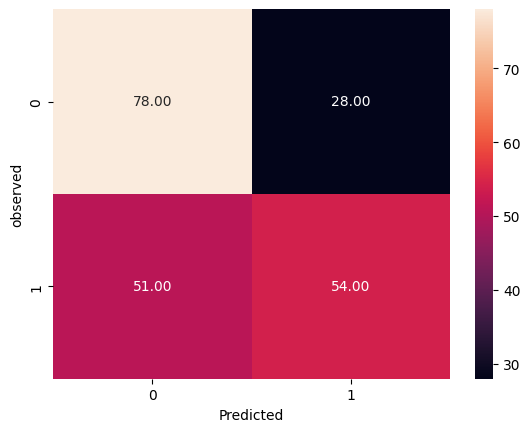

In [125]:
confusion_matrix_vizualiser(y_test, predictions_svc)

In [126]:
print(classification_report(y_test, predictions_svc))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66       106
           1       0.66      0.51      0.58       105

    accuracy                           0.63       211
   macro avg       0.63      0.63      0.62       211
weighted avg       0.63      0.63      0.62       211



## Neural Networks

In [127]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [128]:
# Defining our sequential model
nn = Sequential()
nn.add(Dense(32, input_shape=(x_train.shape[1],), activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(8, activation='sigmoid'))
nn.add(Dense(1))

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                608       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [129]:
nn.compile(optimizer='adam',loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [130]:
import time

In [131]:
startnn = time.perf_counter()

EPOCHS = 10
BATCH_SIZE = 10
history = nn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE)



endnn = time.perf_counter()

print('Execution Completed in:', endnn - startnn)

nn_timer = endnn - startnn

Epoch 1/10
64/64 [==============================] - 2s 6ms/step - loss: 0.9933 - accuracy: 0.4992 - val_loss: 0.9219 - val_accuracy: 0.5024
Epoch 2/10
64/64 [==============================] - 0s 3ms/step - loss: 0.8769 - accuracy: 0.4992 - val_loss: 0.8993 - val_accuracy: 0.5024
Epoch 3/10
64/64 [==============================] - 0s 3ms/step - loss: 0.8124 - accuracy: 0.4992 - val_loss: 0.7625 - val_accuracy: 0.5024
Epoch 4/10
64/64 [==============================] - 0s 3ms/step - loss: 0.7493 - accuracy: 0.4992 - val_loss: 0.7352 - val_accuracy: 0.5024
Epoch 5/10
64/64 [==============================] - 0s 3ms/step - loss: 0.7289 - accuracy: 0.4992 - val_loss: 0.7206 - val_accuracy: 0.5024
Epoch 6/10
64/64 [==============================] - 0s 3ms/step - loss: 0.7178 - accuracy: 0.4992 - val_loss: 0.7136 - val_accuracy: 0.5024
Epoch 7/10
64/64 [==============================] - 0s 3ms/step - loss: 0.7124 - accuracy: 0.4992 - val_loss: 0.7102 - val_accuracy: 0.5024
Epoch 8/10
64/64 [==

In [132]:
score = nn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7064450979232788
Test accuracy: 0.5023696422576904


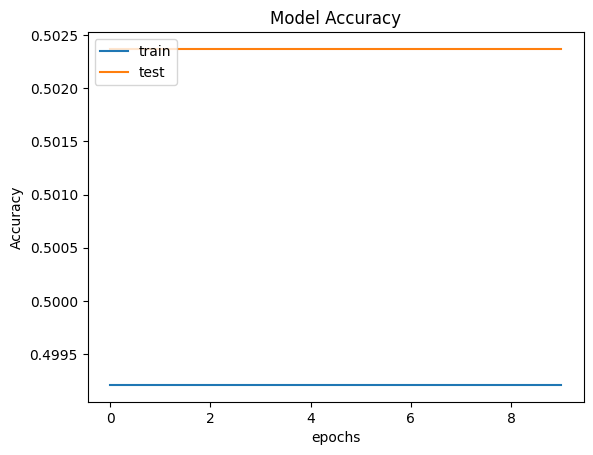

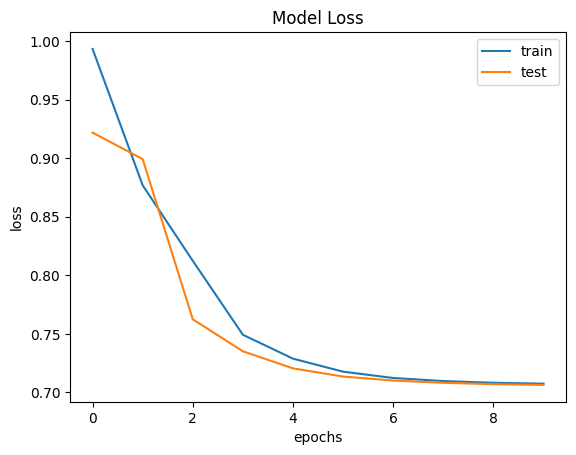

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Applying Neural Networks on a smaller data set with smaller number of features and with only 18 features, may result in inaccurate network training. Therefore, in the above graph, we see that both training and testing accruacy stay constant throuh out the training proecss

### But the training and the testing losses decreased over a period of time